In [87]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import interpolate
pi = np.pi

In [290]:
theta_0 = -pi/6
rho = 3000 #kg/m^3
D = 0.2 #m
E = 10000*1e6 #N/m^2
I = pi*D**4/64 #m^4
w = 9.8*rho*pi*D*D #N/m
N = 1001


ls = range(2,21)
coords = np.zeros([2*len(ls),N])

for iter in range(len(ls)):
  l = ls[iter]
  s = np.linspace(0,l,N)
  k = w*l**3/(E*I)
  eta = s/l

  def eq(x,y):
    global k
    return np.vstack((y[1],-k*(1-x)*np.cos(y[0])))

  def bc(ya,yb):
    global theta_0
    return np.array([ya[0] - theta_0, yb[1]])

  theta_init = np.zeros((2,N))
  theta_init[0,int(N/2)] = 0
  sol = integrate.solve_bvp(eq, bc, eta, theta_init)
  theta = interpolate.interp1d(eta, sol.y[0,:])

  for i in range(N):
    a = 0
    b = eta[i]
    intrv = np.linspace(a,b,257)
    theta_domain = theta(intrv)
    coords[2*iter,i] = l*integrate.simpson(np.cos(theta_domain),intrv)
    coords[2*iter+1,i] = l*integrate.simpson(np.sin(theta_domain),intrv)



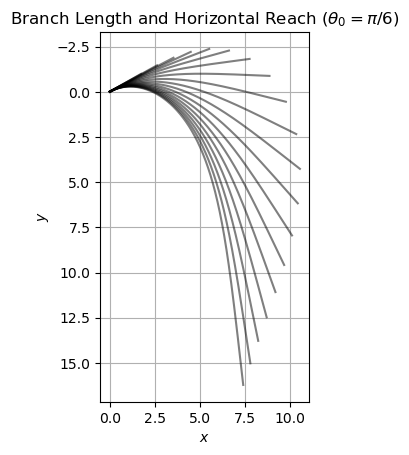

In [301]:
fig, ax = plt.subplots()
ax.set_title(r'Branch Length and Horizontal Reach ($\theta_0 = \pi/6$)')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_aspect('equal', adjustable='box')
plt.gca().invert_yaxis()
for i in range(len(ls)):
  plt.plot(coords[2*i,:],coords[2*i+1,:],color='k',alpha=0.5)
plt.grid()
plt.show()

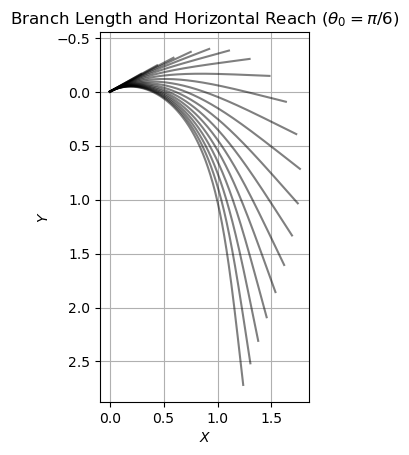

In [300]:
fig, ax = plt.subplots()
ax.set_title(r'Branch Length and Horizontal Reach ($\theta_0 = \pi/6$)')
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.set_aspect('equal', adjustable='box')
plt.gca().invert_yaxis()
for i in range(len(ls)):
  plt.plot(coords[2*i,:]/(E*I/w)**(1/3),coords[2*i+1,:]/(E*I/w)**(1/3),color='k',alpha=0.5)
plt.grid()
plt.show()

In [308]:
a = np.ones(10)
lg = 3
print(a[::-1])
print(np.cumsum(a[::-1]))
print(np.cumsum(a[::-1])[::-1])
print(np.cumsum(a[::-1])[::-1] > 3)
print(np.sum(np.cumsum(a[::-1])[::-1] > 3))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[10.  9.  8.  7.  6.  5.  4.  3.  2.  1.]
[ True  True  True  True  True  True  True False False False]
7
